In [18]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import qgrid
import beakerx as bx
from datetime import datetime as dtt

from pa_lib.file import data_files, load_bin, store_bin, store_excel
from pa_lib.df   import calc_col_partitioned, clean_up_categoricals, flatten, replace_col, cond_col, desc_col
from pa_lib.util import obj_size
from pa_lib.log  import time_log

# display long columns completely
pd.set_option('display.max_colwidth', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_files()

,size,mtime
name,,
bd_data.csv.zip,151.6 MB,25.04.19 10:14:28
bd_data.feather,184.5 MB,25.04.19 10:14:34
bd_data_raw.feather,327.1 MB,25.04.19 10:14:28
bd_data_vkprog.feather,95.7 MB,25.04.19 10:14:38
crm_data.csv.zip,16.8 MB,25.04.19 13:44:19
crm_data.feather,51.5 MB,25.04.19 13:44:19
crm_data_vkprog.feather,42.6 MB,25.04.19 13:44:21
plz_data.csv.zip,36.3 KB,25.04.19 13:46:37
plz_data.feather,135.7 KB,25.04.19 13:46:37


In [4]:
bd = load_bin('bd_data_vkprog.feather')

2019-04-25 14:41:06 [INFO] Reading from file /home/pa/data/bd_data_vkprog.feather
2019-04-25 14:41:06 [INFO] Finished loading binary file in 0.13s (0.3s CPU)


In [6]:
desc_col(bd, True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/743796,26331,2.9 MB,"[100034,654783]"
ENDKUNDE,category,0/743796,24856,4.0 MB,"[""Persönlich"" Verlags AG,ô quai des arts]"
EK_ABC,category,2532/741264,8,727.2 KB,"[nan,NO]"
EK_PLZ,category,155/743641,2982,1.7 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,154/743642,2878,1.7 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,154/743642,55,732.4 KB,"[nan,USA]"
EK_HB_APG_KURZZ,category,36034/707762,83,733.8 KB,"[nan,YIL]"
EK_AKTIV,category,0/743796,2,726.5 KB,"[0,1]"
AGENTUR,category,355900/387896,3300,1.8 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/743796,167,1.4 MB,"[ABB,ZHU]"


#### Set up plotting

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = [15, 10]

In [75]:
data = bd.loc[bd.NETTO > 0].pipe(clean_up_categoricals)

### Plots

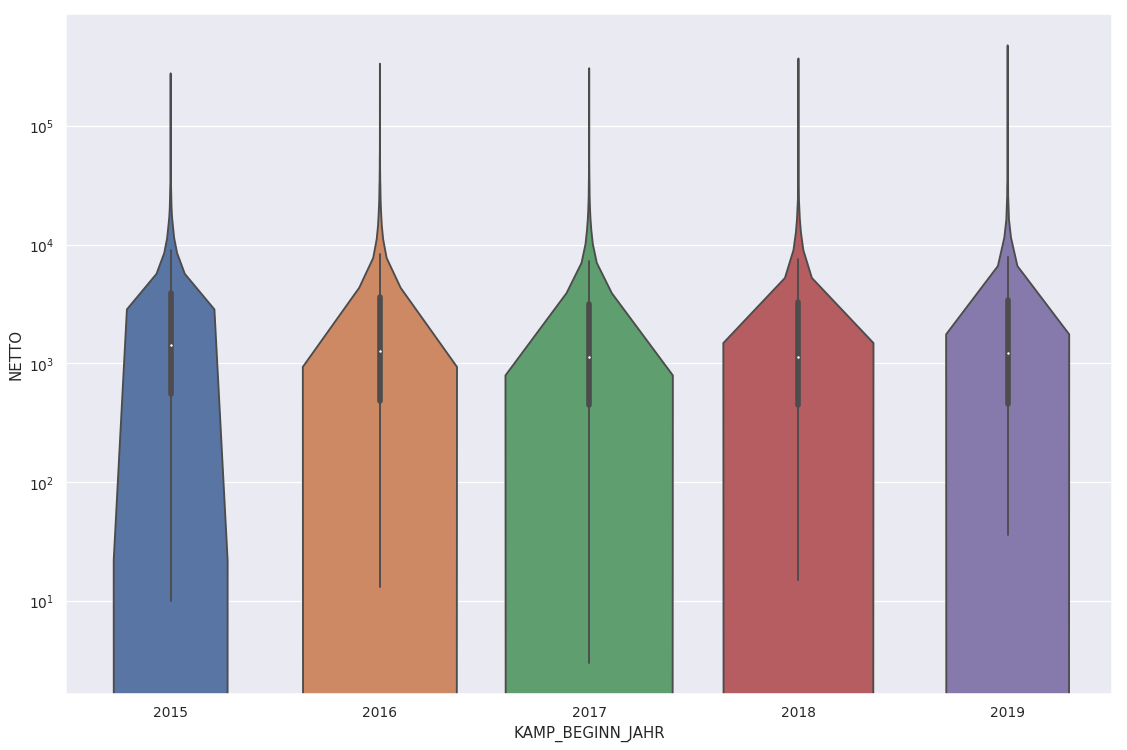

In [49]:
plt.yscale('log')
sns.violinplot(x=data.KAMP_BEGINN_JAHR, y=data.NETTO)

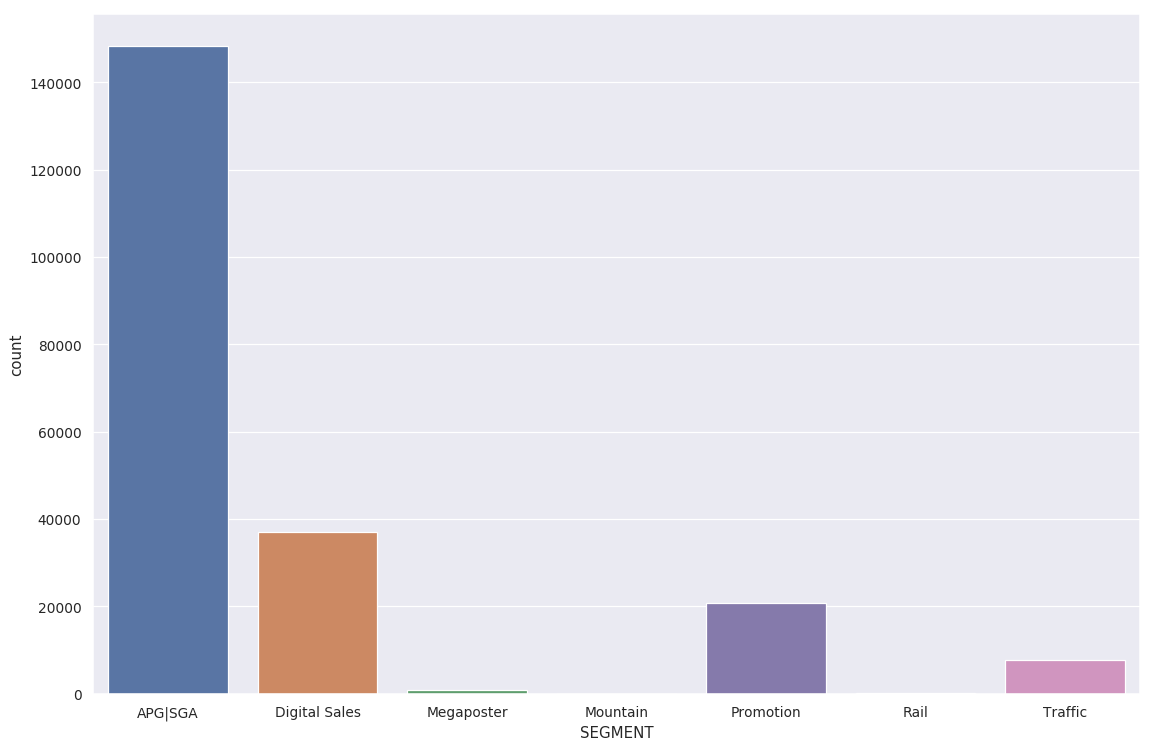

In [50]:
sns.countplot(data.SEGMENT)

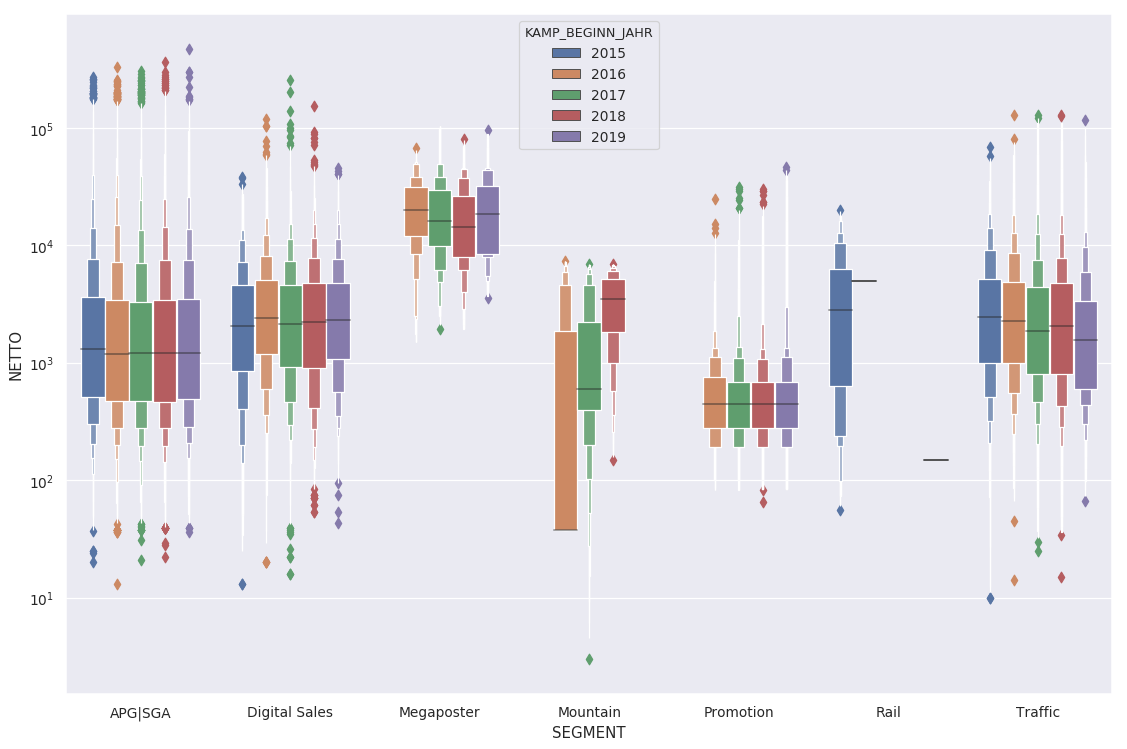

In [48]:
plt.yscale('log')
sns.boxenplot(data=data, x='SEGMENT', y='NETTO', hue='KAMP_BEGINN_JAHR')

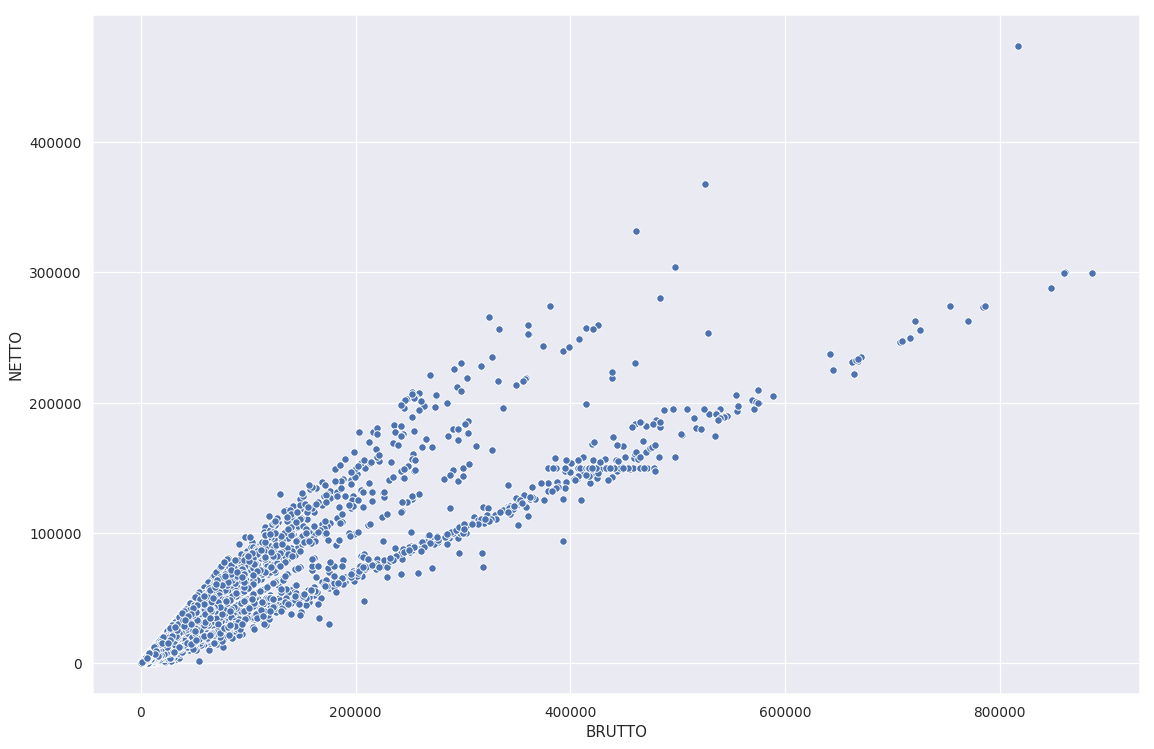

In [51]:
sns.scatterplot(x=data.BRUTTO, y=data.NETTO)

In [87]:
desc_col(data, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/214520,12447,12.5 MB,"[100034,654783]"
ENDKUNDE,category,0/214520,11855,13.3 MB,"[""einfach-luxuriös"",Österreich Werbung Deutschland GmbH]"
EK_ABC,category,0/214520,8,11.8 MB,"[A,NO]"
EK_PLZ,category,12/214508,2031,12.2 MB,"[nan,WC2E 9JL]"
EK_ORT,category,12/214508,1958,12.3 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,12/214508,33,11.8 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,6741/207779,45,11.8 MB,"[nan,YAM]"
EK_AKTIV,category,0/214520,2,11.8 MB,"[0,1]"
AGENTUR,category,100439/114081,1644,12.2 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/214520,96,11.8 MB,"[ABS,ZHU]"


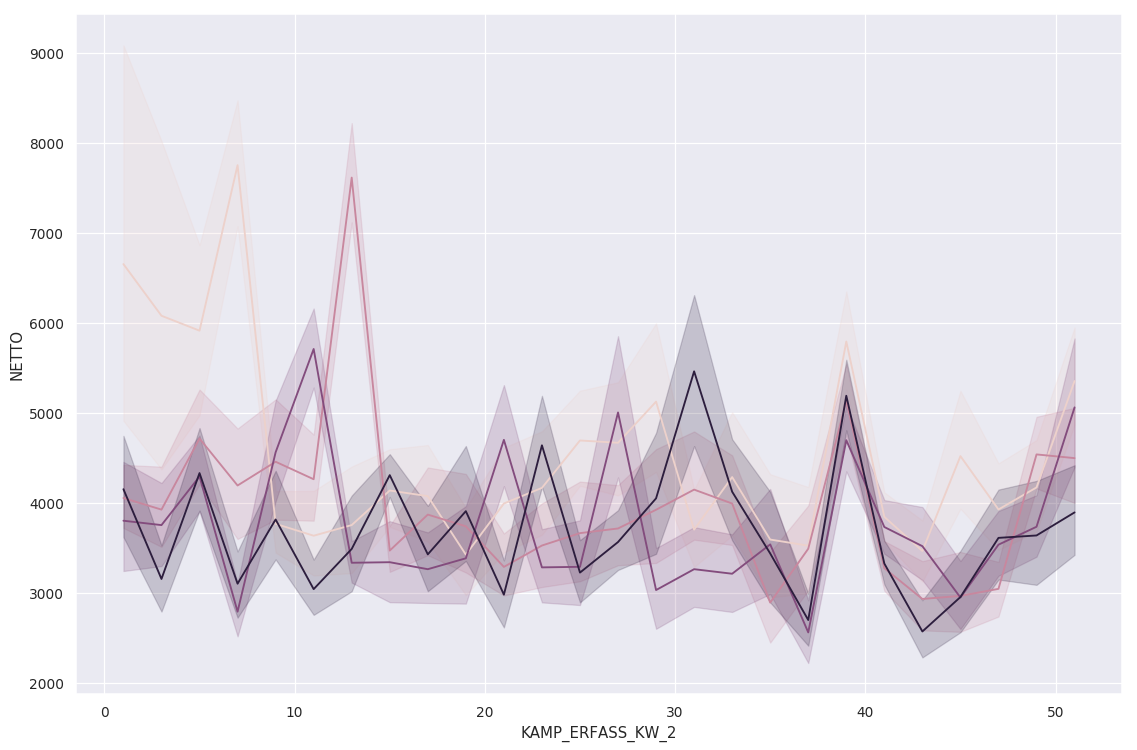

In [98]:
sns.lineplot(data=data.loc[(data.KAMP_ERFASS_JAHR > 2014) & (data.KAMP_ERFASS_JAHR < 2019)], 
             x='KAMP_ERFASS_KW_2', y='NETTO', hue='KAMP_ERFASS_JAHR', legend=False)